# Latent Dirichlet Allocation for Text Data

In this assignment you will

* apply standard preprocessing techniques on Wikipedia text data
* use Sklearn to fit a Latent Dirichlet allocation (LDA) model
* explore and interpret the results, including topic keywords and topic assignments for documents

Recall that a major feature distinguishing the LDA model from our previously explored methods is the notion of *mixed membership*. Throughout the course so far, our models have assumed that each data point belongs to a single cluster. k-means determines membership simply by shortest distance to the cluster center, and Gaussian mixture models suppose that each data point is drawn from one of their component mixture distributions. In many cases, though, it is more realistic to think of data as genuinely belonging to more than one cluster or category - for example, if we have a model for text data that includes both "Politics" and "World News" categories, then an article about a recent meeting of the United Nations should have membership in both categories rather than being forced into just one.

With this in mind, we will use a Sklearn module to fit an LDA model to a corpus of Wikipedia articles and examine the results to analyze the impact of a mixed membership approach. In particular, we want to identify the topics discovered by the model in terms of their most important words, and we want to use the model to predict the topic membership distribution for a given document. 

**Note to Amazon EC2 users**: To conserve memory, make sure to stop all the other notebooks before running this notebook.

## Text Data Preprocessing
We'll start by importing our familiar Wikipedia dataset.

In [1]:
# use LatentDirichletAllocation to topic document. Then use it to retrieve document too
# contrast with nearestneighbor
# from __future__ import print_function # to conform python 2.x print to python 3.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import wiki data
#wiki = turicreate.SFrame('people_wiki.sframe/')
data = pd.read_csv("people_wiki.csv", header=0)
data.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In the original data, each Wikipedia article is represented by a URI, a name, and a string containing the entire text of the article. Recall from the video lectures that LDA requires documents to be represented as a _bag of words_, which ignores word ordering in the document but retains information on how many times each word appears. As we have seen in our previous encounters with text data, words such as 'the', 'a', or 'and' are by far the most frequent, but they appear so commonly in the English language that they tell us almost nothing about how similar or dissimilar two documents might be. 

Therefore, before we train our LDA model, we should preprocess the Wikipedia data by removing stop words (words that have little to no meaning in the data). Good thing that the default implementation of CountVectorizer come with an option to filter the stop words in english.

In [3]:
#wiki_docs = turicreate.text_analytics.count_words(wiki['text'])
#wiki_docs = wiki_docs.dict_trim_by_keys(turicreate.text_analytics.stop_words(), exclude=True)
from sklearn.feature_extraction.text import CountVectorizer
# either use the inbuilt 'english' stopwords, or to use max_df
vectorizer = CountVectorizer(max_features=200000, stop_words='english') # max_df=0.9
data_matrix = count_data = vectorizer.fit_transform(data["text"])

## Model fitting and interpretation
In the video lectures we saw that Gibbs sampling can be used to perform inference in the LDA model. In this assignment we will use Sklearn to learn the topic model for our Wikipedia data, and our main emphasis will be on interpreting the results. The model is detailed <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">here</a>.

Note: This may take up to an hour to run on single core. You can change the `n_jobs` option if your CPU allows it, otherwise prepare yourself accordingly.

In [4]:
#topic_model = turicreate.topic_model.create(wiki_docs, num_topics=10, num_iterations=200)
#print(data_matrix.shape)
from sklearn.decomposition import LatentDirichletAllocation
topic_model = LatentDirichletAllocation(n_components=10, max_iter=50, random_state=1, verbose=50)
topic_model.fit(data_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 1 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 2 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 3 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 4 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 5 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 6 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


iteration: 7 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 8 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 9 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 10 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 11 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 12 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 13 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 14 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


iteration: 15 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 16 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


iteration: 17 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 18 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 19 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


iteration: 20 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


iteration: 21 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 22 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 23 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 24 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


iteration: 25 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


iteration: 26 of max_iter: 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 27 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 28 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 29 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 30 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 31 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 32 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 33 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 34 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 35 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 36 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 37 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 38 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 39 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 40 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 41 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 42 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 43 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 44 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 45 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 46 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 47 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 48 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 49 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 50 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.6s finished


LatentDirichletAllocation(max_iter=50, random_state=1, verbose=50)

It is certainly useful to have pre-implemented methods available for LDA, but as with our previous methods for clustering and retrieval, implementing and fitting the model gets us only halfway towards our objective. We now need to analyze the fitted model to understand what it has done with our data and whether it will be useful as a document classification system. This can be a challenging task in itself, particularly when the model that we use is complex. We will begin by outlining a sequence of objectives that will help us understand our model in detail. In particular, we will

* get the top words in each topic and use these to identify topic themes
* predict topic distributions for some example documents
* compare the quality of LDA "nearest neighbors" to the NN output from the first assignment
* understand the role of model hyperparameters alpha and gamma

## Identifying topic themes by top words

We'll start by trying to identify the topics learned by our model with some major themes. As a preliminary check on the results of applying this method, it is reasonable to hope that the model has been able to learn topics that correspond to recognizable categories. In order to do this, we must first recall what exactly a 'topic' is in the context of LDA. 

In the video lectures on LDA we learned that a topic is a probability distribution over words in the vocabulary; that is, each topic assigns a particular probability to every one of the unique words that appears in our data. Different topics will assign different probabilities to the same word: for instance, a topic that ends up describing science and technology articles might place more probability on the word 'university' than a topic that describes sports or politics. Looking at the highest probability words in each topic will thus give us a sense of its major themes. Ideally we would find that each topic is identifiable with some clear theme _and_ that all the topics are relatively distinct.

The assumption is that the feature vector is currently a counting vector, so we can easily extract the n-most important words by a simple `.argsort` function and pythonic list manipulation.

__Quiz Question:__ Identify the top 3 most probable words for the first topic. 

**Quiz Question:** What is the sum of the probabilities assigned to the top 50 words in the 3rd topic?

In [7]:
def retrieve_top_words(topic, feature_names, n_top_words=3):
    # Note that `topic` will already contain a vector of [features]
    return np.array(feature_names)[np.argsort(-topic)][:n_top_words]# Your code here

Let's look at the top 10 words for each topic to see if we can identify any themes:

In [8]:
#[x['words'] for x in topic_model.get_topics(output_type='topic_words', num_words=10)]
for topic_idx, topic in enumerate(topic_model.components_):
    top_words = retrieve_top_words(topic, vectorizer.get_feature_names(), n_top_words=10)
    print("Topic #{:d}: {:s}".format( topic_idx, ", ".join(top_words) ))

Topic #0: university, research, new, american, business, development, director, science, company, national
Topic #1: university, professor, college, school, international, member, born, studies, director, national
Topic #2: art, new, work, museum, arts, york, artist, church, design, works
Topic #3: season, league, played, games, career, team, born, game, player, baseball
Topic #4: united, war, military, air, years, born, rights, states, police, force
Topic #5: music, album, new, band, born, released, film, television, including, radio
Topic #6: party, served, member, election, state, minister, law, president, elected, born
Topic #7: film, book, published, award, books, new, best, born, magazine, writer
Topic #8: club, played, league, season, team, football, cup, born, career, player
Topic #9: world, won, team, championships, championship, time, national, coach, born, champion


We propose the following themes for each topic:

- topic 0: Musics
- topic 1: Football
- topic 2: Education
- topic 3: Athletics
- topic 4: Academic backgrounds
- topic 5: Politics
- topic 6: Baseball
- topic 7: Media
- topic 8: International
- topic 9: Arts


We'll save these themes for later:

In [99]:
themes = ['business',
          'science and research',
          'art and publishing',
          'baseball',
          'politics',
          'general music',
          'family and society',
          'tV and film',
          'team sports',
          'international athletics']
# original
# - topic 0: Business
# - topic 1: Science and research
# - topic 2: International music
# - topic 3: Art and publishing
# - topic 4: Team sports
# - topic 5: Family and society
# - topic 6: Politics
# - topic 7: International athletics
# - topic 8: TV and film
# - topic 9: General music

# themes = ['musics',
#           'football',
#           'education',
#           'athletics',
#           'academic backgrounds',
#           'politics',
#           'baseball',
#           'media',
#           'international',
#           'arts']


### Measuring the importance of top words

We can learn more about topics by exploring how they place probability mass (which we can think of as a weight) on each of their top words.

We'll do this with two visualizations of the weights for the top words in each topic:
 - the weights of the top 100 words, sorted by the size
 - the total weight of the top 10 words


Here's a plot for the top 100 words by weight in each topic:

Text(0.5, 1.0, 'Probabilities of Top 100 Words in each Topic')

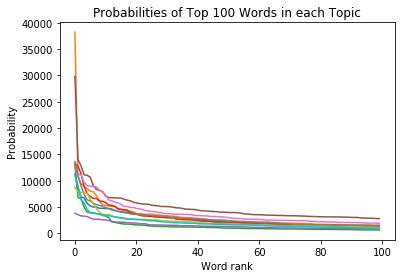

In [100]:
for i in range(10):
    topic = topic_model.components_[i]
    topic.sort()
    plt.plot(range(100), topic[-100:][::-1])
plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')

In the above plot, each line corresponds to one of our ten topics. Notice how for each topic, the weights drop off sharply as we move down the ranked list of most important words. This shows that the top 10-20 words in each topic are assigned a much greater weight than the remaining words - and remember from the summary of our topic model that our vocabulary has 547462 words in total!


Next we plot the total weight assigned by each topic to its top 10 words: 

[0.053354525880064875, 0.10030381460715619, 0.08559876855450936, 0.0821224368568077, 0.040466444086519185, 0.05562598798467143, 0.077626875114926, 0.06608527699158441, 0.09061896146739556, 0.09114963015191825]


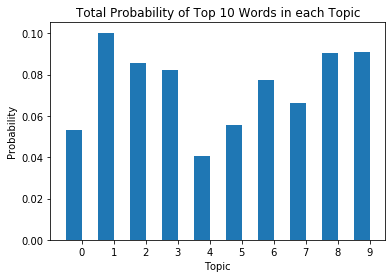

In [101]:
top_probs = [sum(np.sort(topic_model.components_[i])[-10:]) / sum(topic_model.components_[i]) for i in range(10)]
print(top_probs)
ind = np.arange(10)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind-(width/2),top_probs,width)
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
#plt.xlim(-0.5,9.5)
#plt.ylim(0,0.15)
plt.show()

Here we see that, for our topic model, the top 10 words only account for a small fraction (in this case, between 5% and 11%) of their topic's total probability mass. So while we can use the top words to identify broad themes for each topic, we should keep in mind that in reality these topics are more complex than a simple 10-word summary.

Finally, we observe that some 'junk' words appear highly rated in some topics despite our efforts to remove unhelpful words before fitting the model; for example, the word 'born' appears as a top 10 word in three different topics, but it doesn't help us describe these topics at all.

## Topic distributions for some example documents

As we noted in the introduction to this assignment, LDA allows for mixed membership, which means that each document can partially belong to several different topics. For each document, topic membership is expressed as a vector of weights that sum to one; the magnitude of each weight indicates the degree to which the document represents that particular topic.

We'll explore this in our fitted model by looking at the topic distributions for a few example Wikipedia articles from our data set. We should find that these articles have the highest weights on the topics whose themes are most relevant to the subject of the article - for example, we'd expect an article on a politician to place relatively high weight on topics related to government, while an article about an athlete should place higher weight on topics related to sports or competition.

Topic distributions for documents can be obtained using the inate `.transform` function which is part of Sklearn's default interface. To get a document-specific topic proportion vector post-facto, `.transform` convert the vector into a distribution given the sampled word assignments in the document.

In [102]:
obama_idx = data[data['name'] == 'Barack Obama'].index[0]
obama_feature = data_matrix[obama_idx]
topic_distribution = topic_model.transform(obama_feature)
print(topic_distribution)

[[3.58713859e-02 4.52126745e-02 3.11579346e-04 3.11616730e-04
  2.01026584e-01 3.11588405e-04 7.16019801e-01 3.11578322e-04
  3.11610756e-04 3.11581339e-04]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


We can streamline the process into a function. 

In [103]:
def predict_topic(name, theme_output=True):
    # write your own here
    idx = data[data['name'] == name].index[0]
    features = data_matrix[idx]
    topic_distribution = topic_model.transform(features)
    return themes[np.argmax(topic_distribution)] if theme_output  else topic_distribution[0]

__Quiz Question:__ What is the topic most closely associated with the article about former US President George W. Bush?

In [104]:
predict_topic('George W. Bush')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


'family and society'

__Quiz Question:__ What are the top 3 topics corresponding to the article about English football (soccer) player Steven Gerrard?

In [105]:
predict_topic('Steven Gerrard')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


'team sports'

In [106]:
np.array(themes)[np.argsort(-predict_topic('Steven Gerrard', False))<3] # use minus sign because of sorting by descending order

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array(['general music', 'team sports', 'international athletics'],
      dtype='<U23')

## Comparing LDA to nearest neighbors for document retrieval

So far we have found that our topic model has learned some coherent topics, we have explored these topics as probability distributions over a vocabulary, and we have seen how individual documents in our Wikipedia data set are assigned to these topics in a way that corresponds with our expectations. 

In this section, we will use the predicted topic distribution as a representation of each document, similar to how we have previously represented documents by word count or TF-IDF. This gives us a way of computing distances between documents, so that we can run a nearest neighbors search for a given document based on its membership in the topics that we learned from LDA. We can contrast the results with those obtained by running nearest neighbors under the usual TF-IDF representation, an approach that we explored in a previous assignment. 

We need to calculate both the TF-IDF vectors and the LDA probabilities.

In [94]:
#wiki['lda'] = topic_model.predict(wiki_docs, output_type='probability')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_data = TfidfVectorizer(max_features=200000, sublinear_tf=True).fit_transform(data["text"])
lda_data = topic_model.transform(count_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.8s finished


For each of our two different document representations, we can use Sklearn to build a K-NN model each to compute nearest neighbors through brute-force:

In [95]:
from sklearn.neighbors import NearestNeighbors
model_tf_idf = NearestNeighbors(metric="cosine").fit(tfidf_data)
model_lda_rep = NearestNeighbors(metric="cosine").fit(lda_data)

Let's compare these nearest neighbor models by finding the nearest neighbors under each representation on an example document. For this example we'll use Paul Krugman, an American economist:

In [96]:
def query_knn(name, vector, model, k=10):
    idx = data[data["name"] == name].index[0]
    query = np.reshape(vector[idx], [1, -1])
    neighbors_idx = model.kneighbors(query, n_neighbors=k+1, return_distance=False).flatten()[1:]
    return data.iloc[neighbors_idx]

In [97]:
# 'Paul Krugman' using TF-IDF
query_knn('Paul Krugman', tfidf_data, model_tf_idf)

,URI,name,text
42353,<http://dbpedia.org/resource/Elise_Brezis>,Elise Brezis,elise s brezis professor of economics at baril...
22732,<http://dbpedia.org/resource/Sophie_Meunier>,Sophie Meunier,sophie meunier born in france is a research sc...
32000,<http://dbpedia.org/resource/Herbert_Grubel>,Herbert Grubel,herbert gunter grubel born february 26 1934 in...
41608,<http://dbpedia.org/resource/John_A._List>,John A. List,john august list born september 25 1968 is the...
46311,<http://dbpedia.org/resource/John_Schmitt_(eco...,John Schmitt (economist),john schmitt born may 6 1962 is an american ec...
16500,<http://dbpedia.org/resource/Kevin_M._Murphy>,Kevin M. Murphy,kevin miles murphy born 1958 is the george j s...
43174,<http://dbpedia.org/resource/Manoj_Pant>,Manoj Pant,manoj pant professor jawaharlal nehru universi...
46695,<http://dbpedia.org/resource/Gordon_Rausser>,Gordon Rausser,gordon rausser is the robert gordon sproul dis...
35968,<http://dbpedia.org/resource/Alan_Blinder>,Alan Blinder,alan stuart blinder born october 14 1945 is an...
17915,<http://dbpedia.org/resource/Charles_Horioka>,Charles Horioka,charles yuji horioka born september 7 1956 in ...


In [98]:
# 'Paul Krugman' using LDA
query_knn('Paul Krugman', lda_data, model_lda_rep)

,URI,name,text
9269,<http://dbpedia.org/resource/Jean-Daniel_Fekete>,Jean-Daniel Fekete,jeandaniel fekete is a french computer scienti...
6882,<http://dbpedia.org/resource/Vinod_Johri>,Vinod Johri,vinod johri 10 june 1935 10 may 2014 was an in...
22194,<http://dbpedia.org/resource/Aloysius_Prakash_...,Aloysius Prakash Fernandez,aloysius prakash fernandez is an indian econom...
24869,<http://dbpedia.org/resource/Larry_Temkin>,Larry Temkin,larry temkin is an american philosopher specia...
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...
1069,<http://dbpedia.org/resource/Janet_Radcliffe_R...,Janet Radcliffe Richards,janet radcliffe richards born 1944 is a britis...
50901,<http://dbpedia.org/resource/Mario_Kova%C4%8D_...,Mario Kova%C4%8D (scientist),mario kova is a croatian computer engineering ...
49680,<http://dbpedia.org/resource/Shekhar_Chaudhuri>,Shekhar Chaudhuri,shekhar chaudhuri is an indian academic and ma...
34908,<http://dbpedia.org/resource/Bruno_Latour>,Bruno Latour,bruno latour french latu born 22 june 1947 is ...
46311,<http://dbpedia.org/resource/John_Schmitt_(eco...,John Schmitt (economist),john schmitt born may 6 1962 is an american ec...


Notice that that there is no overlap between the two sets of top 10 nearest neighbors. This doesn't necessarily mean that one representation is better or worse than the other, but rather that they are picking out different features of the documents. 

With TF-IDF, documents are distinguished by the frequency of uncommon words. Since similarity is defined based on the specific words used in the document, documents that are "close" under TF-IDF tend to be similar in terms of specific details. This is what we see in the example: the top 10 nearest neighbors are all economists from the US, UK, or Canada. 

Our LDA representation, on the other hand, defines similarity between documents in terms of their topic distributions. This means that documents can be "close" if they share similar themes, even though they may not share many of the same keywords. For the article on Paul Krugman, we expect the most important topics to be 'American college and politics' and 'science and research'. As a result, we see that the top 10 nearest neighbors are academics from a wide variety of fields, including literature, anthropology, and religious studies.